In [32]:
!pip install xgboost

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [34]:
# Load the dataset
file_path = "/Users/keerthi/Documents/diabetes_012_health_indicators_BRFSS2015.csv"
df = pd.read_csv(file_path)

In [35]:
# Display basic informationabout the dataset
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [36]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [37]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 23899


In [38]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()
print(f"Shape after removing duplicates: {df_cleaned.shape}")

Shape after removing duplicates: (229781, 22)


In [39]:
# Generate summary statistics
print(df_cleaned.describe())

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  229781.000000  229781.000000  229781.000000  229781.000000   
mean        0.325627       0.454441       0.441760       0.959535   
std         0.724623       0.497921       0.496598       0.197047   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  229781.00000  229781.000000  229781.000000         229781.000000   
mean       28.68567       0.465661       0.044756              0.103216   
std         6.78636       0.498821       0.206767              0.304241   
min        12.00000       0.000000       0.000000              0.000000   
25%

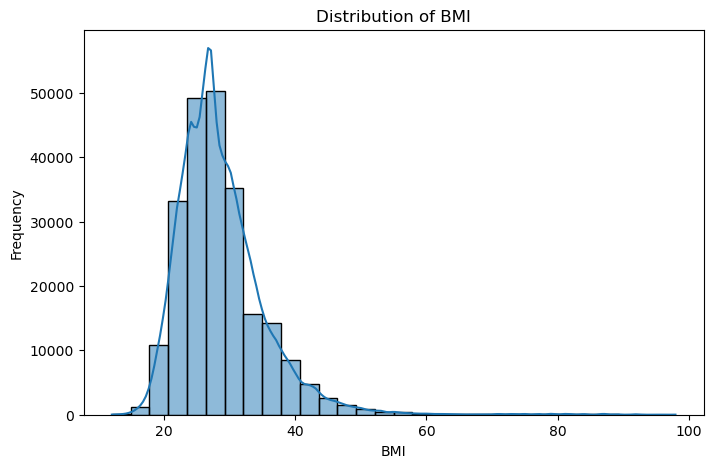

In [40]:
# Distribution of BMI
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['BMI'], bins=30, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

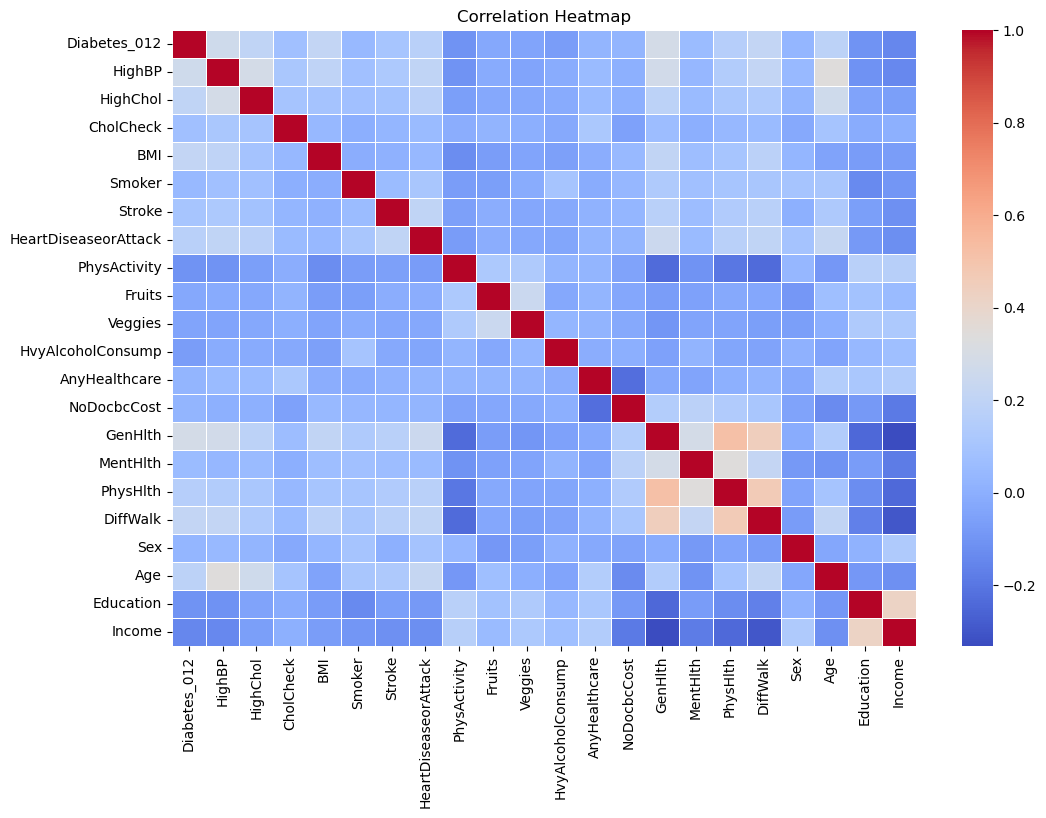

In [41]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_cleaned.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

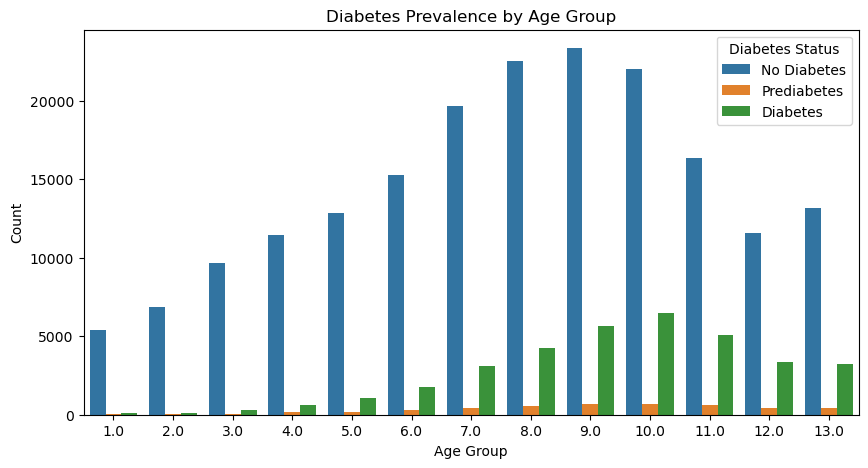

In [42]:
# Diabetes prevalence by age group
plt.figure(figsize=(10,5))
sns.countplot(x='Age', hue='Diabetes_012', data=df_cleaned)
plt.title("Diabetes Prevalence by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Diabetes Status", labels=["No Diabetes", "Prediabetes", "Diabetes"])
plt.show()

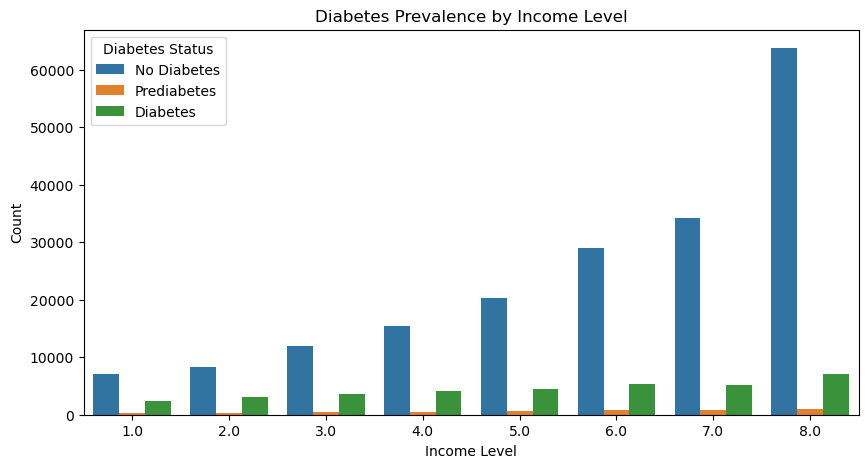

In [43]:
# Diabetes prevalence by income level
plt.figure(figsize=(10,5))
sns.countplot(x='Income', hue='Diabetes_012', data=df_cleaned)
plt.title("Diabetes Prevalence by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Count")
plt.legend(title="Diabetes Status", labels=["No Diabetes", "Prediabetes", "Diabetes"])
plt.show()

In [44]:
# Build predictive models for diabetes risk using machine learning

# Selecting features and target variable
X = df_cleaned.drop(columns=['Diabetes_012'])
y = df_cleaned['Diabetes_012']

In [45]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Make predictions
y_pred = model.predict(X_test)

In [48]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     38116
         1.0       0.00      0.00      0.00       906
         2.0       0.46      0.20      0.27      6935

    accuracy                           0.82     45957
   macro avg       0.44      0.38      0.39     45957
weighted avg       0.78      0.82      0.79     45957



The accuracy is 82%, meaning the model correctly predicts diabetes status 82% of the time.

Class 0.0 (No Diabetes)
- Precision = 0.85 → 85% of predicted 0.0 cases were correct.
- Recall = 0.96 → 96% of actual 0.0 cases were correctly predicted.
- Model performs very well for this class.

Class 1.0 (Prediabetes)
- Precision = 0.00 → The model never correctly predicts prediabetes.
- Recall = 0.00 → No actual prediabetes cases were classified correctly.
- The model fails for this class (likely due to imbalance in the dataset).

Class 2.0 (Diabetes)
- Precision = 0.46 → 46% of predicted 2.0 cases were correct.
- Recall = 0.20 → Only 20% of actual diabetes cases were correctly identified.
- Model struggles with this class too.

Issues & Next Steps
- The model is biased towards class 0.0 (No Diabetes)
    - Since most people in the dataset don’t have diabetes, the model learns to predict 0.0 most of the time.
- Poor performance on 1.0 (Prediabetes)
    - Likely due to class imbalance (too few prediabetes cases to learn from).
    - Solution: Use oversampling (SMOTE) or class weighting to balance the dataset.
- Low recall for 2.0 (Diabetes)
    - The model only detects 20% of actual diabetes cases, which is bad for medical applications.
    - Solution: Try different models (e.g., XGBoost) and tune hyperparameters.


In [49]:
# Selecting features and target variable
X = df_cleaned.drop(columns=['Diabetes_012'])
y = df_cleaned['Diabetes_012']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     38012
         1.0       0.02      0.00      0.00       926
         2.0       0.45      0.22      0.29      7019

    accuracy                           0.82     45957
   macro avg       0.44      0.39      0.40     45957
weighted avg       0.77      0.82      0.79     45957



Class 0.0 (No Diabetes) is still dominating predictions

Issues with Class 1.0 (Prediabetes)
- Precision = 0.02, Recall = 0.00, F1-score = 0.00
- This means the model still struggles to identify prediabetes cases
- Likely cause: Even with SMOTE, class 1.0 is still too small compared to 0.0 and 2.0

Class 2.0 (Diabetes) Improved Slightly
- Precision increased from 0.46 → 0.45 (slight drop)
- Recall increased from 0.20 → 0.22 (small improvement)
- F1-score improved slightly from 0.28 → 0.29
- More diabetes cases are being predicted correctly.

In [52]:
# Selecting features and target variable
X = df_cleaned.drop(columns=['Diabetes_012'])
y = df_cleaned['Diabetes_012']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a RandomForestClassifier with class weighting
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, class_weight="balanced", random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions with RandomForest
rf_y_pred = rf_model.predict(X_test)

# Evaluate the RandomForest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"RandomForest Model Accuracy: {rf_accuracy:.2f}")
print("RandomForest Classification Report:\n", classification_report(y_test, rf_y_pred, zero_division=1))

# Train an XGBoost Classifier with tuned parameters
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=10,  # Adjusting class balance
    eval_metric="mlogloss",
    random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions with XGBoost
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"XGBoost Model Accuracy: {xgb_accuracy:.2f}")
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_y_pred, zero_division=1))

RandomForest Model Accuracy: 0.79
RandomForest Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     38012
         1.0       0.01      0.00      0.00       926
         2.0       0.40      0.49      0.44      7019

    accuracy                           0.79     45957
   macro avg       0.43      0.45      0.44     45957
weighted avg       0.80      0.79      0.79     45957



/Users/keerthi/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.83
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     38012
         1.0       1.00      0.00      0.00       926
         2.0       0.52      0.28      0.37      7019

    accuracy                           0.83     45957
   macro avg       0.80      0.41      0.42     45957
weighted avg       0.81      0.83      0.81     45957

